<a href="https://colab.research.google.com/github/skywalker0803r/Algorithm-NFT/blob/main/anomalydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 784)
(10000, 784)
Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0481
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0252
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0212
Epoch 4/10
235/235 [=====================

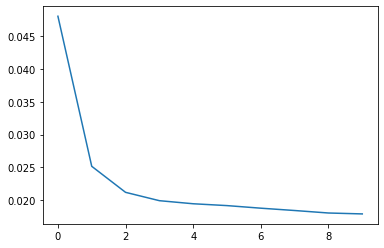

In [1]:
import requests
from keras.datasets import mnist
import numpy as np

# data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

# model
url = 'https://gist.githubusercontent.com/skywalker0803r/34d37597170cbdcb98395f37a0ec073a/raw/f2d1d718d639eb1914ac01f3c69599fd9ab9946f/anomalydetection.py'
exec(requests.get(url).text)
model = anomalydetection(input_dim=x_train.shape[1],encoding_dim=32)
model.train(x_train,epochs=10,batch_size=256)

# 正常樣本

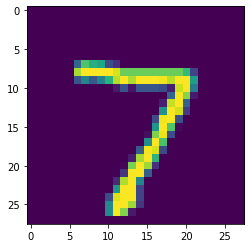

重建損失


0.0149195315

In [2]:
sample = x_test[0].reshape(28,28)
plt.imshow(sample)
plt.show()
print('重建損失')
model.predict(sample.reshape(1,-1))

# 異常樣本

(28, 28)


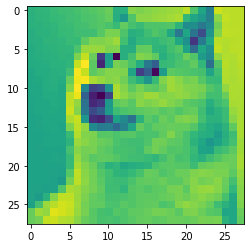

重建損失


17253.828

In [3]:
sample = cv2.imread('/content/doge.jpg')
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
print(sample.shape)
plt.imshow(sample)
plt.show()
print('重建損失')
model.predict(sample.reshape(1,-1))